# Notebook for the study of different sdB formation channels

## General imports and stuff

In [19]:
import os, sys    # for handling paths
import h5py as h5  #for handling data format
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from IPython.display import Image
from scipy.stats import gaussian_kde
from astropy import units as u

In [20]:
kg = ( 1.988416 * 10**(30) )**(-1) # in solar mass

m = ( 6.957 * 10**(8) )**(-1) # in solar radii

s = ( 86400 )**(-1) # in days

G =  6.67430 * 10**(-11) * kg**(-1) * s**(-2) * m**(3) # in (solar radii)^3 (solar masses)^(-1) days^(-2)

# use astropy for the units

In [21]:
# set path to data file
path1 = '/home/louism/Thesis/Thesis-Scripts/Grid/Set3/COMPAS_Output_set3/COMPAS_Output.h5'
path2 = '/home/louism/Thesis/Thesis-Scripts/Grid/Set4/COMPAS_Output_set4/COMPAS_Output.h5'
# load the file
set1 = h5.File(path1)
set2 = h5.File(path2)

## Masks

In [22]:
def is_ce(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = (RLOF['CEE>MT'][()]==1)
    return mask

In [54]:
def is_rlof(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = (RLOF['CEE>MT'][()]==0)
    return mask

In [23]:
def is_donor1(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = (RLOF['RLOF(1)>MT'][()]==1)
    return mask

def is_donor2(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = (RLOF['RLOF(2)>MT'][()]==1)
    return mask

In [24]:
def was_fgb1(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = np.in1d(RLOF['Stellar_Type(1)<MT'][()], [3,4])
    return mask

def was_fgb2(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = np.in1d(RLOF['Stellar_Type(2)<MT'][()], [3,4])
    return mask

def was_hg1(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = np.in1d(RLOF['Stellar_Type(1)<MT'][()], [2])
    return mask

def was_hg2(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = np.in1d(RLOF['Stellar_Type(1)<MT'][()], [2])
    return mask

In [25]:
def now_he_star1(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = np.in1d(RLOF['Stellar_Type(1)>MT'][()], [7,8,9])
    return mask

def now_he_star2(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = np.in1d(RLOF['Stellar_Type(2)>MT'][()], [7,8,9])
    return mask

In [26]:
def ms_companion1(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = np.in1d(RLOF['Stellar_Type(2)<MT'][()], [1,2,16])
    return mask

def ms_companion2(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = np.in1d(RLOF['Stellar_Type(1)<MT'][()], [1,2,16])
    return mask

def wd_companion1(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = np.in1d(RLOF['Stellar_Type(2)<MT'][()], [10,11,12])
    return mask

def wd_companion2(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = np.in1d(RLOF['Stellar_Type(1)<MT'][()], [10,11,12])
    return mask

In [27]:
def do_not_merge(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = (RLOF['Merger'][()]==0)
    return mask

In [28]:
def has_small_envelope1(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = ((RLOF['Mass(1)'][()]-RLOF['Mass_He_Core(1)'][()])<0.10)
    return mask

def has_small_envelope2(dataset):
    RLOF = dataset['BSE_RLOF']
    mask = ((RLOF['Mass(2)'][()]-RLOF['Mass_He_Core(2)'][()])<0.10)
    return mask

In [29]:
def from_CE_MS(dataset):
    fgb_1 = is_ce(dataset) & was_fgb1(dataset) & now_he_star1(dataset) & ms_companion1(dataset)
    fgb_2 = is_ce(dataset) & was_fgb2(dataset) & now_he_star2(dataset) & ms_companion2(dataset)
    hg_1 = is_ce(dataset) & was_hg1(dataset) & now_he_star1(dataset) & ms_companion1(dataset)
    hg_2 = is_ce(dataset) & was_hg2(dataset) & now_he_star2(dataset) & ms_companion2(dataset)
    full_channel = fgb_1 | fgb_2 | hg_1 | hg_2
    return [fgb_1, fgb_2, hg_1, hg_2, full_channel]

In [30]:
def from_CE_WD(dataset):
    fgb_1 = is_ce(dataset) & was_fgb1(dataset) & now_he_star1(dataset) & wd_companion1(dataset)
    fgb_2 = is_ce(dataset) & was_fgb2(dataset) & now_he_star2(dataset) & wd_companion2(dataset)
    hg_1 = is_ce(dataset) & was_hg1(dataset) & now_he_star1(dataset) & wd_companion1(dataset)
    hg_2 = is_ce(dataset) & was_hg2(dataset) & now_he_star2(dataset) & wd_companion2(dataset)
    full_channel = fgb_1 | fgb_2 | hg_1 | hg_2
    return [fgb_1, fgb_2, hg_1, hg_2, full_channel]

In [55]:
def from_RLOF_MS(dataset):
    fgb_1 = is_rlof(dataset) & was_fgb1(dataset) & now_he_star1(dataset) & ms_companion1(dataset)
    fgb_2 = is_rlof(dataset) & was_fgb2(dataset) & now_he_star2(dataset) & ms_companion2(dataset)
    hg_1 = is_rlof(dataset) & was_hg1(dataset) & now_he_star1(dataset) & ms_companion1(dataset)
    hg_2 = is_rlof(dataset) & was_hg2(dataset) & now_he_star2(dataset) & ms_companion2(dataset)
    full_channel = fgb_1 | fgb_2 | hg_1 | hg_2
    return [fgb_1, fgb_2, hg_1, hg_2, full_channel]

In [56]:
def from_RLOF_WD(dataset):
    fgb_1 = is_rlof(dataset) & was_fgb1(dataset) & now_he_star1(dataset) & wd_companion1(dataset)
    fgb_2 = is_rlof(dataset) & was_fgb2(dataset) & now_he_star2(dataset) & wd_companion2(dataset)
    hg_1 = is_rlof(dataset) & was_hg1(dataset) & now_he_star1(dataset) & wd_companion1(dataset)
    hg_2 = is_rlof(dataset) & was_hg2(dataset) & now_he_star2(dataset) & wd_companion2(dataset)
    full_channel = fgb_1 | fgb_2 | hg_1 | hg_2
    return [fgb_1, fgb_2, hg_1, hg_2, full_channel]

## Functions

In [57]:
def logPeriod(dataset, channel_mask):
    RLOF = dataset['BSE_RLOF']
    logP = np.log10( 2*np.pi/np.sqrt(G) * np.sqrt( (RLOF['SemiMajorAxis>MT'][channel_mask])**3 / (RLOF['Mass(1)>MT'][channel_mask]+RLOF['Mass(2)>MT'][channel_mask]) ))
    return logP

In [94]:
def periodDistributions(dataset):
    fig, axes= plt.subplots(2,2, figsize=(10,10))
    plt.suptitle('Period distribution of the sdBs from the different formation channels', fontsize=20)

    ax = axes[0][0]
    ax.set_title('CE with MS companion')
    ax.set_xlabel('log P (days)')
    ax.set_ylabel('Count')
    ax.hist(logPeriod(dataset, (from_CE_MS(dataset)[0])), color='lightblue', label='CE on FGB (1)', alpha=0.7)
    ax.hist(logPeriod(dataset, (from_CE_MS(dataset)[1])), color='limegreen', label='CE on FGB (2)', alpha=0.7)
    ax.hist(logPeriod(dataset, (from_CE_MS(dataset)[2])), color='coral', label='CE on HG (1)', alpha=0.7)
    ax.hist(logPeriod(dataset, (from_CE_MS(dataset)[3])), color='yellow', label='CE on FGB (2)', alpha=0.7)
    ax.legend()
    
    ax = axes[0][1]
    ax.set_title('CE with WD companion')
    ax.set_xlabel('log P (days)')
    ax.set_ylabel('Count')
    ax.hist(logPeriod(dataset, (from_CE_WD(dataset)[0])), color='lightblue', label='CE on FGB (1)', alpha=0.7)
    ax.hist(logPeriod(dataset, (from_CE_WD(dataset)[1])), color='limegreen', label='CE on FGB (2)', alpha=0.7)
    ax.hist(logPeriod(dataset, (from_CE_WD(dataset)[2])), color='coral', label='CE on HG (1)', alpha=0.7)
    ax.hist(logPeriod(dataset, (from_CE_WD(dataset)[3])), color='yellow', label='CE on FGB (2)', alpha=0.7)
    ax.legend()
    
    ax = axes[1][0]
    ax.set_title('RLOF with MS companion')
    ax.set_xlabel('log P (days)')
    ax.set_ylabel('Count')
    ax.hist(logPeriod(dataset, (from_RLOF_MS(dataset)[0])), color='lightblue', label='RLOF on FGB (1)', alpha=0.7)
    ax.hist(logPeriod(dataset, (from_RLOF_MS(dataset)[1])), color='limegreen', label='CE on FGB (2)', alpha=0.7)
    ax.hist(logPeriod(dataset, (from_RLOF_MS(dataset)[2])), color='coral', label='RLOF on HG (1)', alpha=0.7)
    ax.hist(logPeriod(dataset, (from_RLOF_MS(dataset)[3])), color='yellow', label='CE on FGB (2)', alpha=0.7)
    ax.legend()

    ax = axes[1][1]
    ax.set_title('RLOF with WD companion')
    ax.set_xlabel('log P (days)')
    ax.set_ylabel('Count')
    ax.hist(logPeriod(dataset, (from_RLOF_WD(dataset)[0])), color='lightblue', label='RLOF on FGB (1)', alpha=0.7)
    ax.hist(logPeriod(dataset, (from_RLOF_WD(dataset)[1])), color='limegreen', label='CE on FGB (2)', alpha=0.7)
    ax.hist(logPeriod(dataset, (from_RLOF_WD(dataset)[2])), color='coral', label='RLOF on HG (1)', alpha=0.7)
    ax.hist(logPeriod(dataset, (from_RLOF_WD(dataset)[3])), color='yellow', label='CE on FGB (2)', alpha=0.7)
    ax.legend()

    
    plt.tight_layout()
    plt.show()

In [126]:
def massDistributions(dataset):
    RLOF = dataset['BSE_RLOF']
    fig, axes= plt.subplots(2,2, figsize=(10,10))
    plt.suptitle('Mass distribution of the sdBs from the different formation channels', fontsize=20)

    ax = axes[0][0]
    ax.set_title('CE with MS companion')
    ax.set_xlabel('Mass (solar mass)')
    ax.set_ylabel('Count')
    ax.hist(RLOF['Mass(1)>MT'][(from_CE_MS(dataset)[0])], color='lightblue', label='CE on FGB (1)', alpha=0.7)
    ax.hist(RLOF['Mass(2)>MT'][(from_CE_MS(dataset)[1])], color='limegreen', label='CE on FGB (2)', alpha=0.7)
    ax.hist(RLOF['Mass(1)>MT'][(from_CE_MS(dataset)[2])], color='coral', label='CE on HG (1)', alpha=0.7)
    ax.hist(RLOF['Mass(2)>MT'][(from_CE_MS(dataset)[3])], color='yellow', label='CE on FGB (2)', alpha=0.7)
    ax.legend()
    
    ax = axes[0][1]
    ax.set_title('CE with WD companion')
    ax.set_xlabel('Mass (solar mass)')
    ax.set_ylabel('Count')
    ax.hist(RLOF['Mass(1)>MT'][(from_CE_WD(dataset)[0])], color='lightblue', label='CE on FGB (1)', alpha=0.7)
    ax.hist(RLOF['Mass(2)>MT'][(from_CE_WD(dataset)[1])], color='limegreen', label='CE on FGB (2)', alpha=0.7)
    ax.hist(RLOF['Mass(1)>MT'][(from_CE_WD(dataset)[2])], color='coral', label='CE on HG (1)', alpha=0.7)
    ax.hist(RLOF['Mass(2)>MT'][(from_CE_WD(dataset)[3])], color='yellow', label='CE on FGB (2)', alpha=0.7)
    ax.legend()
    
    ax = axes[1][0]
    ax.set_title('RLOF with MS companion')
    ax.set_xlabel('Mass (solar mass)')
    ax.set_ylabel('Count')
    ax.hist(RLOF['Mass(1)>MT'][(from_RLOF_MS(dataset)[0])], color='lightblue', label='CE on FGB (1)', alpha=0.7)
    ax.hist(RLOF['Mass(2)>MT'][(from_RLOF_MS(dataset)[1])], color='limegreen', label='CE on FGB (2)', alpha=0.7)
    ax.hist(RLOF['Mass(1)>MT'][(from_RLOF_MS(dataset)[2])], color='coral', label='CE on HG (1)', alpha=0.7)
    ax.hist(RLOF['Mass(2)>MT'][(from_RLOF_MS(dataset)[3])], color='yellow', label='CE on FGB (2)', alpha=0.7)
    ax.legend()

    ax = axes[1][1]
    ax.set_title('RLOF with WD companion')
    ax.set_xlabel('Mass (solar mass)')
    ax.set_ylabel('Count')
    ax.hist(RLOF['Mass(1)>MT'][(from_RLOF_WD(dataset)[0])], color='lightblue', label='CE on FGB (1)', alpha=0.7)
    ax.hist(RLOF['Mass(2)>MT'][(from_RLOF_WD(dataset)[1])], color='limegreen', label='CE on FGB (2)', alpha=0.7)
    ax.hist(RLOF['Mass(1)>MT'][(from_RLOF_WD(dataset)[2])], color='coral', label='CE on HG (1)', alpha=0.7)
    ax.hist(RLOF['Mass(2)>MT'][(from_RLOF_WD(dataset)[3])], color='yellow', label='CE on FGB (2)', alpha=0.7)
    ax.legend()

    
    plt.tight_layout()
    plt.show()

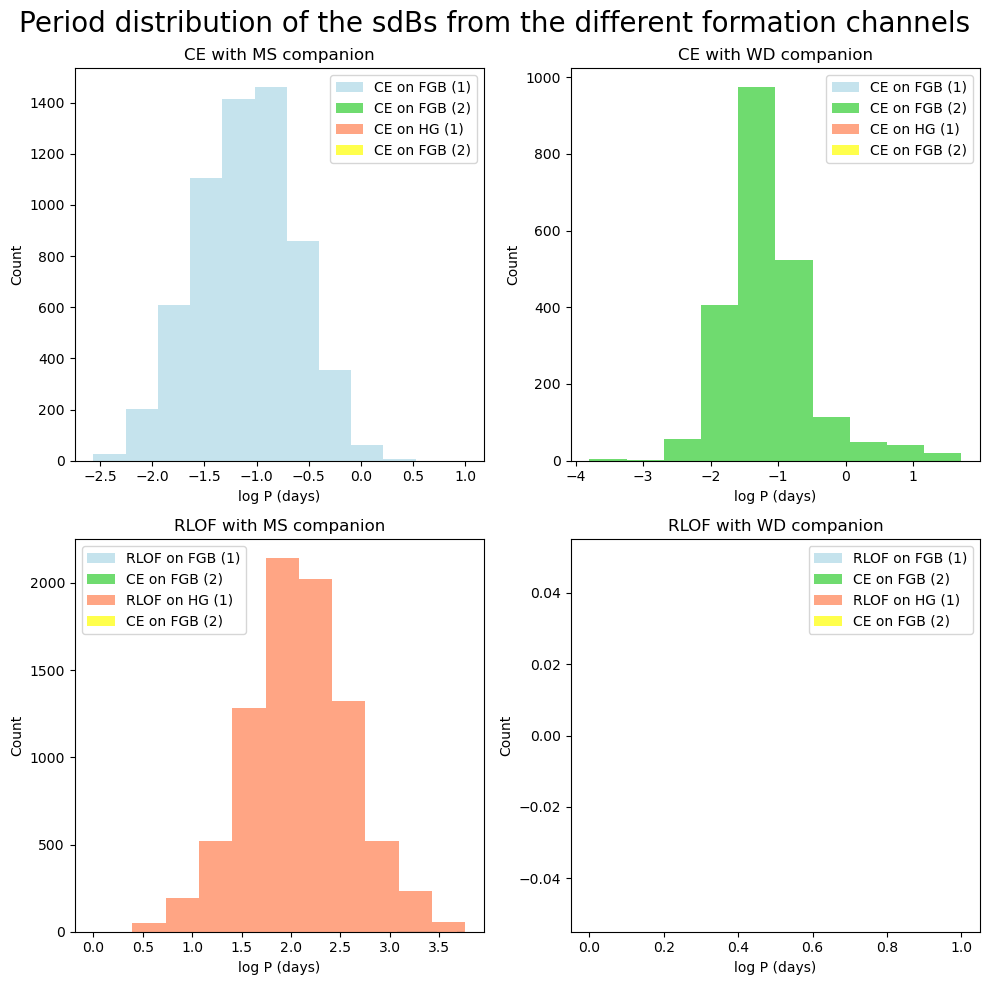

In [127]:
periodDistributions(set1)

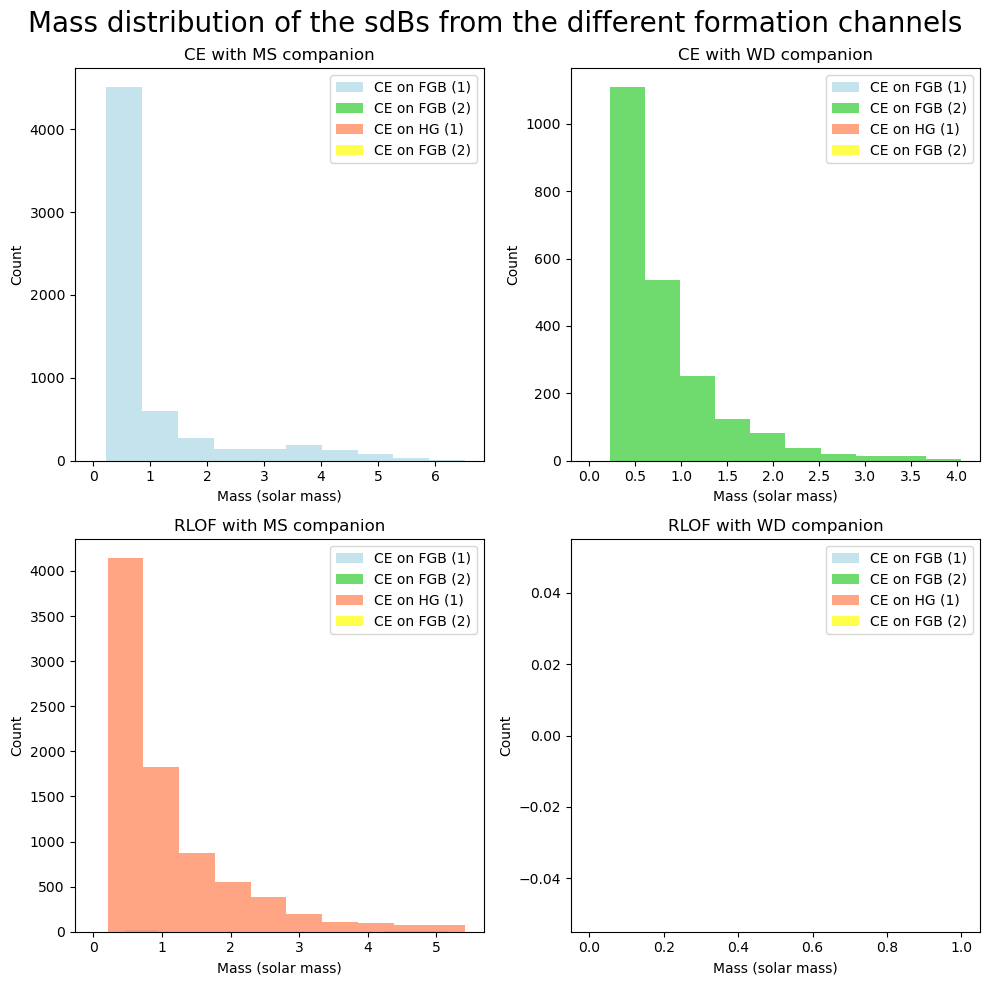

In [128]:
massDistributions(set1)

In [98]:
def comparePeriodHistogram(dataset1, dataset2):
    fig, axes = plt.subplots(1,2, figsize=(12,6))
    plt.suptitle('Period distribution of the sdBs from different datasets', fontsize=20)
    
    ax = axes[0]
    ce_ms_mask = (from_CE_MS(dataset1))[4]
    ce_wd_mask = (from_CE_WD(dataset1))[4]
    rlof_ms_mask = (from_RLOF_MS(dataset1))[4]
    rlof_wd_mask = (from_RLOF_WD(dataset1))[4]
    ce_ms = logPeriod(dataset1, ce_ms_mask)
    ce_wd = logPeriod(dataset1, ce_wd_mask)
    rlof_ms = logPeriod(dataset1, rlof_ms_mask)
    rlof_wd = logPeriod(dataset1, rlof_wd_mask)
    ax.hist(ce_ms, color='lightblue', label='CE+MS', alpha=0.7)
    ax.hist(ce_wd, color='coral', label='CE+WD', alpha=0.7)
    ax.hist(rlof_ms, color='limegreen', label='RLOF+MS', alpha=0.7)
    ax.hist(rlof_wd, color='yellow', label='RLOF+WD', alpha=0.7)
    ax.set_xlabel('log P (days)')
    ax.set_ylabel('Count')
    ax.legend()
    ax.set_title('Period distribution of set 1')
    
    ax = axes[1]
    ce_ms_mask = (from_CE_MS(dataset2))[4]
    ce_wd_mask = (from_CE_WD(dataset2))[4]
    rlof_ms_mask = (from_RLOF_MS(dataset2))[4]
    rlof_wd_mask = (from_RLOF_WD(dataset2))[4]
    ce_ms = logPeriod(dataset2, ce_ms_mask)
    ce_wd = logPeriod(dataset2, ce_wd_mask)
    rlof_ms = logPeriod(dataset2, rlof_ms_mask)
    rlof_wd = logPeriod(dataset2, rlof_wd_mask)
    ax.hist(ce_ms, color='lightblue', label='CE+MS', alpha=0.7)
    ax.hist(ce_wd, color='coral', label='CE+WD', alpha=0.7)
    ax.hist(rlof_ms, color='limegreen', label='RLOF+MS', alpha=0.7)
    ax.hist(rlof_wd, color='yellow', label='RLOF+WD', alpha=0.7)
    ax.set_xlabel('log P (days)')
    ax.set_ylabel('Count')
    ax.legend()
    ax.set_title('Period distribution of set 2')

    plt.tight_layout()

In [121]:
def compareMassHistogram(dataset1, dataset2):
    fig, axes = plt.subplots(1,2, figsize=(12,6))
    plt.suptitle('Mass distribution of the sdBs from different datasets', fontsize=20)
    
    ax = axes[0]
    RLOF = dataset1['BSE_RLOF']
    ce_ms_mask1 = (from_CE_MS(dataset1))[0] | (from_CE_MS(dataset1))[2]
    ce_ms_mask2 = (from_CE_MS(dataset1))[1] | (from_CE_MS(dataset1))[3]
    ce_ms1 = RLOF['Mass(1)>MT'][ce_ms_mask1]
    ce_ms2 = RLOF['Mass(2)>MT'][ce_ms_mask2]
    ce_ms = np.append(ce_ms1, ce_ms2)
    ce_wd_mask1 = (from_CE_WD(dataset1))[0] | (from_CE_WD(dataset1))[2]
    ce_wd_mask2 = (from_CE_WD(dataset1))[1] | (from_CE_WD(dataset1))[3]
    ce_wd1 = RLOF['Mass(1)>MT'][ce_wd_mask1]
    ce_wd2 = RLOF['Mass(2)>MT'][ce_wd_mask2]
    ce_wd = np.append(ce_wd1, ce_wd2)
    rlof_ms_mask1 = (from_RLOF_MS(dataset1))[0] | (from_RLOF_MS(dataset1))[2]
    rlof_ms_mask2 = (from_RLOF_MS(dataset1))[1] | (from_RLOF_MS(dataset1))[3]
    rlof_ms1 = RLOF['Mass(1)>MT'][rlof_ms_mask1]
    rlof_ms2 = RLOF['Mass(2)>MT'][rlof_ms_mask2]
    rlof_ms = np.append(rlof_ms1, rlof_ms2)
    rlof_wd_mask1 = (from_RLOF_WD(dataset1))[0] | (from_RLOF_WD(dataset1))[2]
    rlof_wd_mask2 = (from_RLOF_WD(dataset1))[1] | (from_RLOF_WD(dataset1))[3]
    rlof_wd1 = RLOF['Mass(1)>MT'][rlof_wd_mask1]
    rlof_wd2 = RLOF['Mass(2)>MT'][rlof_wd_mask2]
    rlof_wd = np.append(rlof_wd1, rlof_wd2)
    ax.hist(ce_ms, color='lightblue', label='CE+MS', alpha=0.7)
    ax.hist(ce_wd, color='coral', label='CE+WD', alpha=0.7)
    ax.hist(rlof_ms, color='limegreen', label='RLOF+MS', alpha=0.7)
    ax.hist(rlof_wd, color='yellow', label='RLOF+WD', alpha=0.7)
    ax.set_xlabel('Mass (solar mass)')
    ax.set_ylabel('Count')
    ax.legend()
    ax.set_title('Mass distribution of set 1')
    
    ax = axes[1]
    RLOF = dataset2['BSE_RLOF']
    ce_ms_mask1 = (from_CE_MS(dataset2))[0] | (from_CE_MS(dataset2))[2]
    ce_ms_mask2 = (from_CE_MS(dataset2))[1] | (from_CE_MS(dataset2))[3]
    ce_ms1 = RLOF['Mass(1)>MT'][ce_ms_mask1]
    ce_ms2 = RLOF['Mass(2)>MT'][ce_ms_mask2]
    ce_ms = np.append(ce_ms1, ce_ms2)
    ce_wd_mask1 = (from_CE_WD(dataset2))[0] | (from_CE_WD(dataset2))[2]
    ce_wd_mask2 = (from_CE_WD(dataset2))[1] | (from_CE_WD(dataset2))[3]
    ce_wd1 = RLOF['Mass(1)>MT'][ce_wd_mask1]
    ce_wd2 = RLOF['Mass(2)>MT'][ce_wd_mask2]
    ce_wd = np.append(ce_wd1, ce_wd2)
    rlof_ms_mask1 = (from_RLOF_MS(dataset2))[0] | (from_RLOF_MS(dataset2))[2]
    rlof_ms_mask2 = (from_RLOF_MS(dataset2))[1] | (from_RLOF_MS(dataset2))[3]
    rlof_ms1 = RLOF['Mass(1)>MT'][rlof_ms_mask1]
    rlof_ms2 = RLOF['Mass(2)>MT'][rlof_ms_mask2]
    rlof_ms = np.append(rlof_ms1, rlof_ms2)
    rlof_wd_mask1 = (from_RLOF_WD(dataset2))[0] | (from_RLOF_WD(dataset2))[2]
    rlof_wd_mask2 = (from_RLOF_WD(dataset2))[1] | (from_RLOF_WD(dataset2))[3]
    rlof_wd1 = RLOF['Mass(1)>MT'][rlof_wd_mask1]
    rlof_wd2 = RLOF['Mass(2)>MT'][rlof_wd_mask2]
    rlof_wd = np.append(rlof_wd1, rlof_wd2)
    ax.hist(ce_ms, color='lightblue', label='CE+MS', alpha=0.7)
    ax.hist(ce_wd, color='coral', label='CE+WD', alpha=0.7)
    ax.hist(rlof_ms, color='limegreen', label='RLOF+MS', alpha=0.7)
    ax.hist(rlof_wd, color='yellow', label='RLOF+WD', alpha=0.7)
    ax.set_xlabel('Mass (solar mass)')
    ax.set_ylabel('Count')
    ax.legend()
    ax.set_title('Mass distribution of set 2')

    plt.tight_layout()

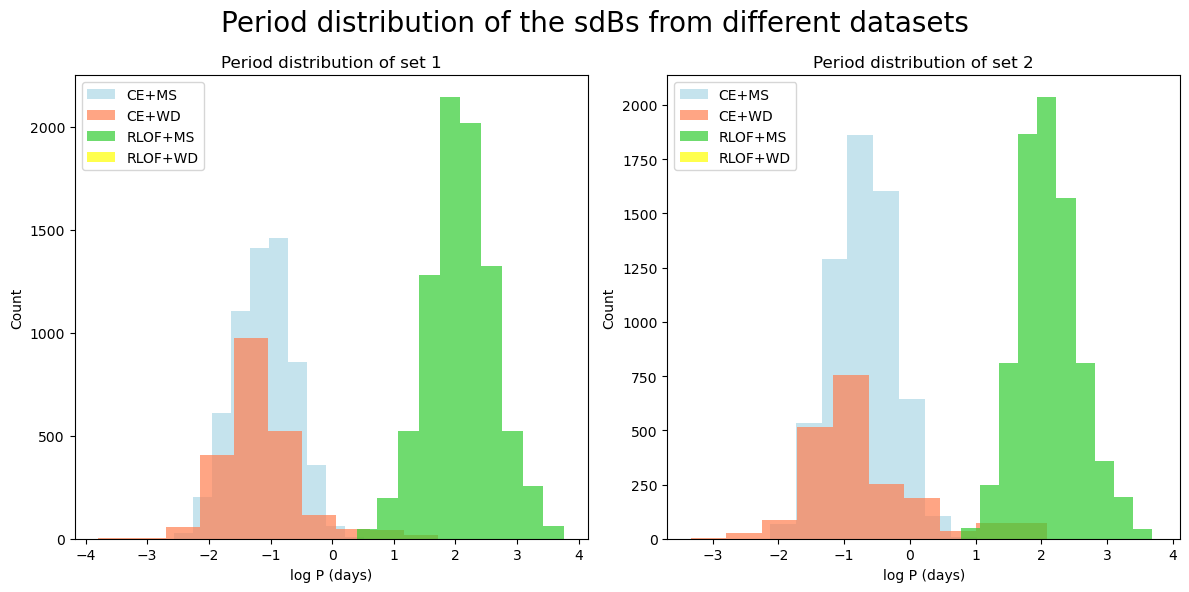

In [119]:
comparePeriodHistogram(set1, set2)

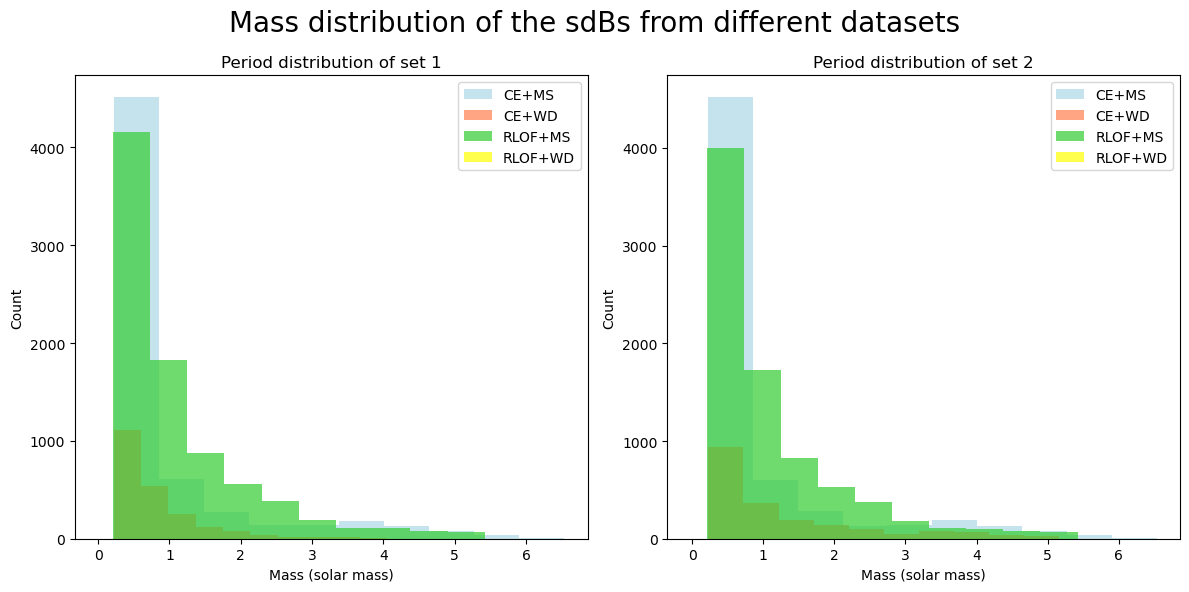

In [120]:
compareMassHistogram(set1, set2)